In [1]:
from utils import load_dataset, train_model, grid_search_VD, grid_search_anchors
from MAPLE import MAPLE
import numpy as np

In [2]:
dataset = "flame"
model_name = "m0"
X_train, X_test, y_train, y_test, X, y, feature_names = load_dataset(dataset)
model = train_model(X_train,y_train, model_name)
print(model.score(X, y))
print(model.score(X_test, y_test))

1.0
1.0


In [3]:
explainer = MAPLE(X_train, model.predict(X_train), X_train, model.predict(X_train))
e = explainer.explain(X_train[0])

In [4]:
x = X_train[0]

In [5]:
intercept = e["coefs"][0]

In [6]:
coefs =  e["coefs"][1:]

In [7]:
e["pred"]

array([0.89873398])

In [8]:
np.sum(np.multiply(x,coefs))+intercept

0.8987339834385066

In [9]:
E = [explainer.explain(x)['coefs'] for x in X_train]

In [10]:
np.asarray(E).shape

(192, 3)

In [11]:
from sklearn.metrics import pairwise_distances

dists_exp = pairwise_distances(E)

In [12]:
dists_exp.shape

(192, 192)

In [13]:
from utils import validity_domains
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay


No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored


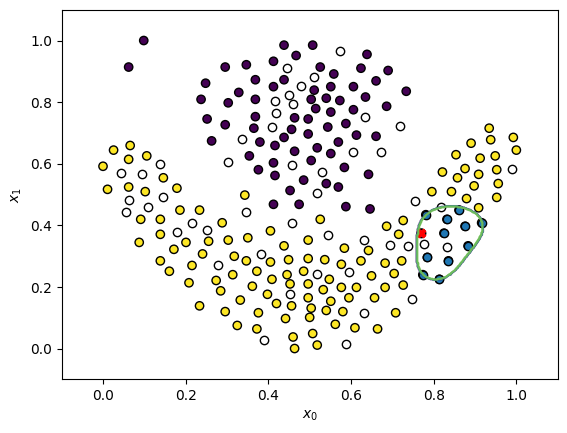

In [32]:
VD, models_VD, explainer = validity_domains(X_train,feature_names,model,threshold_diff=0.3, gamma=50, method="MAPLE")
idx=20
vd = VD[idx]
disp = DecisionBoundaryDisplay.from_estimator(models_VD[idx], X_train,eps=0.1, grid_resolution=500, alpha=0.4, response_method="predict", plot_method='contour')
plt.scatter(X_train[:,0],X_train[:,1], c = model.predict(X_train), edgecolor='k',cmap='viridis')
plt.scatter(X_train[:,0][np.where(vd)],X_train[:,1][np.where(vd)], edgecolor='k',cmap='winter')
plt.scatter(X_test[:,0],X_test[:,1], c='white',edgecolor='k')
plt.scatter(X_train[idx,0],X_train[idx,1], c='r', marker='X')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.savefig('toy_ex/MAPLE_flame_idx20_0.3_50.pdf')
plt.show()